In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("train-data.csv")

In [3]:
train_data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [4]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [5]:
train_data.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [6]:
print(train_data['Location'].unique())
print(train_data['Fuel_Type'].unique())
print(train_data['Transmission'].unique())
print(train_data['Owner_Type'].unique())

['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


# Data Preprocessing

In [7]:
print("Shape of train data Before dropping any Row: ",train_data.shape)
train_data = train_data[train_data['Mileage'].notna()]
print("Shape of train data After dropping Rows with NULL values in Mileage: ",train_data.shape)
train_data = train_data[train_data['Engine'].notna()]
print("Shape of train data After dropping Rows with NULL values in Engine : ",train_data.shape)
train_data = train_data[train_data['Power'].notna()]
print("Shape of train data After dropping Rows with NULL values in Power  : ",train_data.shape)
train_data = train_data[train_data['Seats'].notna()]
print("Shape of train data After dropping Rows with NULL values in Seats  : ",train_data.shape)

Shape of train data Before dropping any Row:  (6019, 14)
Shape of train data After dropping Rows with NULL values in Mileage:  (6017, 14)
Shape of train data After dropping Rows with NULL values in Engine :  (5981, 14)
Shape of train data After dropping Rows with NULL values in Power  :  (5981, 14)
Shape of train data After dropping Rows with NULL values in Seats  :  (5975, 14)


In [8]:
train_data = train_data.reset_index(drop=True)

In [9]:
train_data.rename(columns = {'Company':'Name','Mileage':'Mileage(km)','Engine':'Engine(CC)','Power':'Power(bhp)'}, inplace = True)

In [10]:
train_data['Cars'] =train_data['Name'].str.split(" ").str[0] + ' ' +train_data['Name'].str.split(" ").str[1]

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         5975 non-null   int64  
 1   Name               5975 non-null   object 
 2   Location           5975 non-null   object 
 3   Year               5975 non-null   int64  
 4   Kilometers_Driven  5975 non-null   int64  
 5   Fuel_Type          5975 non-null   object 
 6   Transmission       5975 non-null   object 
 7   Owner_Type         5975 non-null   object 
 8   Mileage(km)        5975 non-null   object 
 9   Engine(CC)         5975 non-null   object 
 10  Power(bhp)         5975 non-null   object 
 11  Seats              5975 non-null   float64
 12  New_Price          823 non-null    object 
 13  Price              5975 non-null   float64
 14  Cars               5975 non-null   object 
dtypes: float64(2), int64(3), object(10)
memory usage: 700.3+ KB


In [12]:
train_data['Mileage(km)'] = train_data['Mileage(km)'].str.replace(' kmpl','')
train_data['Mileage(km)'] = train_data['Mileage(km)'].str.replace(' km/kg','')
train_data['Engine(CC)'] = train_data['Engine(CC)'].str.replace(' CC','')
train_data['Power(bhp)'] = train_data['Power(bhp)'].str.replace('null bhp','112')
train_data['Power(bhp)'] = train_data['Power(bhp)'].str.replace(' bhp','')

In [13]:
train_data['Mileage(km)'] = train_data['Mileage(km)'].astype(float)
train_data['Engine(CC)'] = train_data['Engine(CC)'].astype(float)

In [14]:
train_data['Power(bhp)'] = train_data['Power(bhp)'].astype(float)

In [15]:
train_data = train_data.reset_index(drop=True)

In [16]:
train_data.drop(["Name"],axis=1,inplace=True)
train_data.drop(["New_Price"],axis=1,inplace=True)

In [17]:
feature= ['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
           'Owner_Type', 'Mileage(km)', 'Engine(CC)', 'Power(bhp)', 'Seats','Price','New_car_Price']
train_data= pd.DataFrame(train_data, columns=feature)

In [18]:
train_data.shape

(5975, 13)

# Data Vizualization

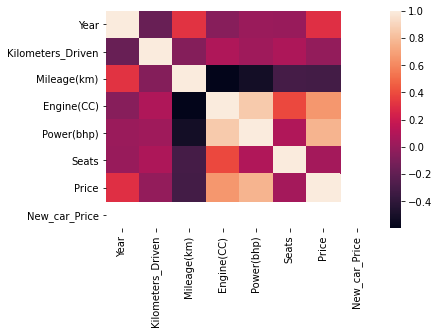

In [19]:
sns.heatmap(train_data.corr());

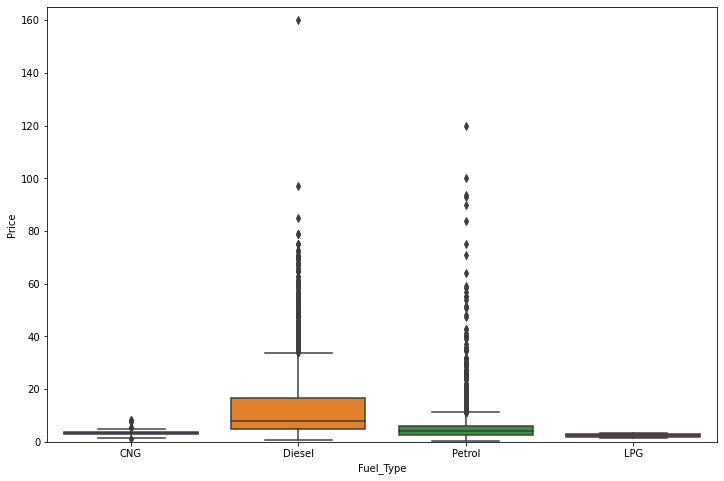

In [20]:
var = 'Fuel_Type'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price",data=data)
fig.axis(ymin=0, ymax=165);

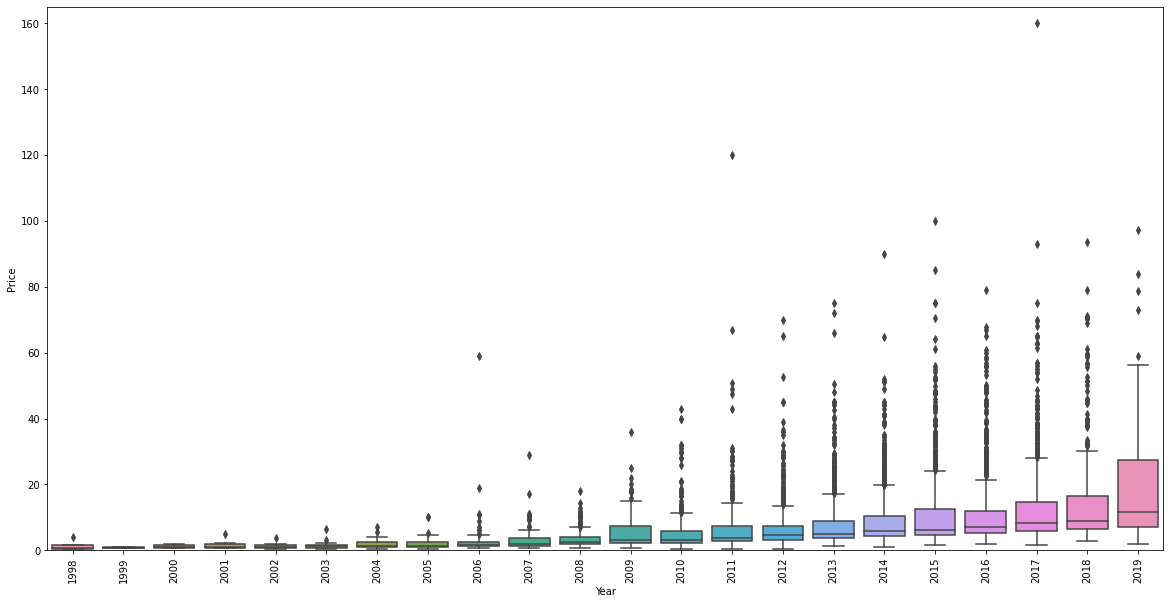

In [21]:
var = 'Year'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

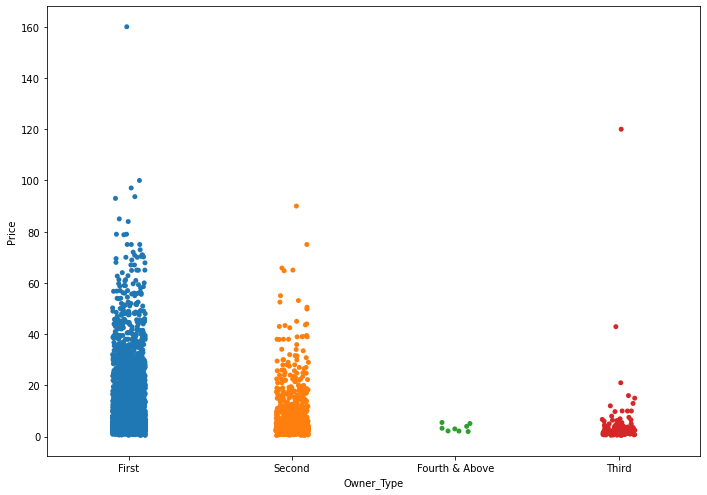

In [22]:
var = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = var, y ='Price', data = train_data) 

<Figure size 1440x720 with 0 Axes>

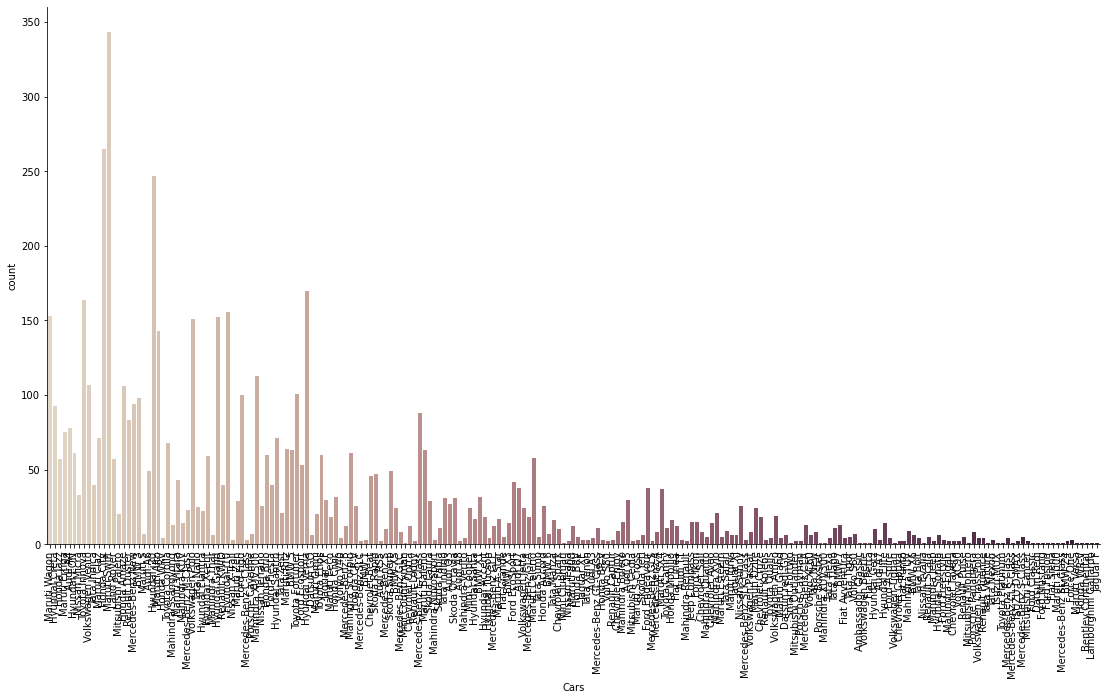

In [23]:
var = 'Cars'
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=train_data);
plt.xticks(rotation=90);

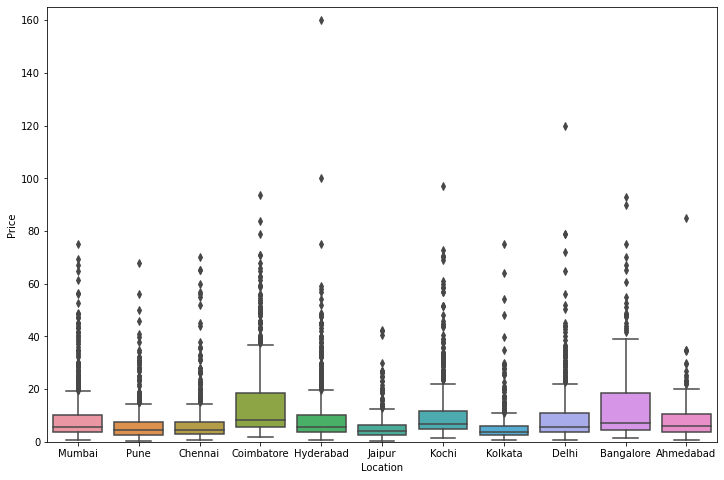

In [24]:
var = 'Location'
data = pd.concat([train_data['Price'], train_data[var]], axis=1)
f, ax = plt.subplots(figsize=(12, 8))
fig = sns.boxplot(x=var, y="Price", data=data)
fig.axis(ymin=0, ymax=165);

In [25]:
train_data = train_data.drop(train_data[train_data['Fuel_Type']=='CNG'].index)

In [26]:
print(train_data['Fuel_Type'].unique())

['Diesel' 'Petrol' 'LPG']


In [27]:
train_data.shape

(5919, 13)

In [28]:
dataMapping = {
    'Diesel' : 0,
    'Petrol' : 1,
    'LPG' : 2
}

In [29]:
train_data['Fuel'] = train_data['Fuel_Type'].map(dataMapping)
train_data.head()

,Cars,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km),Engine(CC),Power(bhp),Seats,Price,New_car_Price,Fuel
1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,NaN,0
2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,NaN,1
3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,NaN,0
4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,NaN,0
5,Hyundai EON,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,2.35,NaN,2


In [30]:
print(train_data['Location'].unique())

['Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Mumbai' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']


In [31]:
train_data = train_data.drop(train_data[train_data['Location']=='Pune'].index)
train_data = train_data.drop(train_data[train_data['Location']=='Coimbatore'].index)
train_data = train_data.drop(train_data[train_data['Location']=='Jaipur'].index)
train_data = train_data.drop(train_data[train_data['Location']=='Kochi'].index)
train_data = train_data.drop(train_data[train_data['Location']=='Ahmedabad'].index)

In [32]:
train_data.shape

(3415, 14)

In [33]:
train_data['Location'].unique()

array(['Chennai', 'Hyderabad', 'Mumbai', 'Kolkata', 'Delhi', 'Bangalore'],
      dtype=object)

In [34]:
train_data.replace({
    'Chennai' : 0,
    'Hyderabad' : 1,
    'Mumbai' : 2,
    'Kolkata' :3,
    'Delhi' : 4,
    'Bangalore': 5
},inplace = True)

In [35]:
train_data.head()

,Cars,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km),Engine(CC),Power(bhp),Seats,Price,New_car_Price,Fuel
2,Honda Jazz,0,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,NaN,1
3,Maruti Ertiga,0,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,NaN,0
5,Hyundai EON,1,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,2.35,NaN,2
7,Toyota Innova,2,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50,NaN,0
9,Tata Indica,0,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,1.95,NaN,0


In [36]:
train_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
train_data

,Cars,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km),Engine(CC),Power(bhp),Seats,Price,New_car_Price,Fuel
2,Honda Jazz,0,2011,46000,Petrol,Manual,1,18.20,1199.0,88.70,5.0,4.50,NaN,1
3,Maruti Ertiga,0,2012,87000,Diesel,Manual,1,20.77,1248.0,88.76,7.0,6.00,NaN,0
5,Hyundai EON,1,2012,75000,LPG,Manual,1,21.10,814.0,55.20,5.0,2.35,NaN,2
7,Toyota Innova,2,2016,36000,Diesel,Automatic,1,11.36,2755.0,171.50,8.0,17.50,NaN,0
9,Tata Indica,0,2012,65932,Diesel,Manual,2,22.30,1248.0,74.00,5.0,1.95,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5966,Honda Brio,4,2013,33746,Petrol,Manual,1,18.50,1198.0,86.80,5.0,3.20,NaN,1
5967,Skoda Superb,1,2009,53000,Petrol,Automatic,1,0.00,3597.0,262.60,5.0,4.75,NaN,1
5970,Maruti Swift,4,2014,27365,Diesel,Manual,1,28.40,1248.0,74.00,5.0,4.75,NaN,0
5973,Maruti Wagon,3,2013,46000,Petrol,Manual,1,18.90,998.0,67.10,5.0,2.65,NaN,1


In [37]:
train_data.replace({"Manual":0,"Automatic":1},inplace=True)

In [38]:
train_data

,Cars,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage(km),Engine(CC),Power(bhp),Seats,Price,New_car_Price,Fuel
2,Honda Jazz,0,2011,46000,Petrol,0,1,18.20,1199.0,88.70,5.0,4.50,NaN,1
3,Maruti Ertiga,0,2012,87000,Diesel,0,1,20.77,1248.0,88.76,7.0,6.00,NaN,0
5,Hyundai EON,1,2012,75000,LPG,0,1,21.10,814.0,55.20,5.0,2.35,NaN,2
7,Toyota Innova,2,2016,36000,Diesel,1,1,11.36,2755.0,171.50,8.0,17.50,NaN,0
9,Tata Indica,0,2012,65932,Diesel,0,2,22.30,1248.0,74.00,5.0,1.95,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5966,Honda Brio,4,2013,33746,Petrol,0,1,18.50,1198.0,86.80,5.0,3.20,NaN,1
5967,Skoda Superb,1,2009,53000,Petrol,1,1,0.00,3597.0,262.60,5.0,4.75,NaN,1
5970,Maruti Swift,4,2014,27365,Diesel,0,1,28.40,1248.0,74.00,5.0,4.75,NaN,0
5973,Maruti Wagon,3,2013,46000,Petrol,0,1,18.90,998.0,67.10,5.0,2.65,NaN,1


In [39]:
train_data.drop(["Fuel_Type","New_car_Price",'Seats'],axis=1,inplace=True)

In [40]:
train_data

,Cars,Location,Year,Kilometers_Driven,Transmission,Owner_Type,Mileage(km),Engine(CC),Power(bhp),Price,Fuel
2,Honda Jazz,0,2011,46000,0,1,18.20,1199.0,88.70,4.50,1
3,Maruti Ertiga,0,2012,87000,0,1,20.77,1248.0,88.76,6.00,0
5,Hyundai EON,1,2012,75000,0,1,21.10,814.0,55.20,2.35,2
7,Toyota Innova,2,2016,36000,1,1,11.36,2755.0,171.50,17.50,0
9,Tata Indica,0,2012,65932,0,2,22.30,1248.0,74.00,1.95,0
...,...,...,...,...,...,...,...,...,...,...,...
5966,Honda Brio,4,2013,33746,0,1,18.50,1198.0,86.80,3.20,1
5967,Skoda Superb,1,2009,53000,1,1,0.00,3597.0,262.60,4.75,1
5970,Maruti Swift,4,2014,27365,0,1,28.40,1248.0,74.00,4.75,0
5973,Maruti Wagon,3,2013,46000,0,1,18.90,998.0,67.10,2.65,1


In [41]:
final_dataset = train_data

In [42]:
final_dataset.columns

Index(['Cars', 'Location', 'Year', 'Kilometers_Driven', 'Transmission',
       'Owner_Type', 'Mileage(km)', 'Engine(CC)', 'Power(bhp)', 'Price',
       'Fuel'],
      dtype='object')

In [43]:
final_dataset['Current_year'] = 2022

In [44]:
final_dataset['No of years'] = final_dataset['Current_year']-final_dataset['Year']

In [45]:
final_dataset.drop(["Year","Current_year"],axis=1,inplace=True)

# Feature Engineering

In [46]:
final_dataset['Price'].value_counts()

4.50     58
5.50     58
3.50     55
3.25     53
6.50     48
         ..
9.70      1
4.83      1
9.85      1
24.95     1
3.81      1
Name: Price, Length: 601, dtype: int64

In [47]:
final_dataset.isnull().sum()

Cars                 0
Location             0
Kilometers_Driven    0
Transmission         0
Owner_Type           0
Mileage(km)          0
Engine(CC)           0
Power(bhp)           0
Price                0
Fuel                 0
No of years          0
dtype: int64

In [48]:
X = final_dataset.loc[:,['No of years', 'Kilometers_Driven', 'Owner_Type',
       'Mileage(km)','Engine(CC)',"Power(bhp)",
       'Location',
       'Fuel', 'Transmission']]
X.shape

(3415, 9)

In [49]:
y = final_dataset.loc[:,['Price']]
y.head()

,Price
2,4.50
3,6.00
5,2.35
7,17.50
9,1.95


# Training Test Split

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3 , random_state = 25)

# RandomForestRegressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred= model.predict(X_test)
print("Accuracy on Traing set: ",model.score(X_train,y_train))
print("Accuracy on Testing set: ",model.score(X_test,y_test))

<ipython-input-51-7c0f8e47c9a6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy on Traing set:  0.9728680121592542
Accuracy on Testing set:  0.8754592471324634


In [52]:
from sklearn.metrics import r2_score
RFR_Score = r2_score(y_test, y_pred)
RFR_Score

0.8754592471324634

# Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
clf_LR = clf.predict(X_test)
print("Accuracy on Traing set: ",clf.score(X_train,y_train))
print("Accuracy on Testing set: ",clf.score(X_test,y_test))

Accuracy on Traing set:  0.6739639944355822
Accuracy on Testing set:  0.3766418182143585


In [54]:
LR_Score = r2_score(y_test, clf_LR)
LR_Score

0.3766418182143585

# Decision Tree Regressor 

In [55]:
from sklearn.tree import DecisionTreeRegressor
rgr = DecisionTreeRegressor(random_state=0)
rgr.fit(X_train, y_train)
rgr_DTR = rgr.predict(X_test)
print("Accuracy on Traing set: ",rgr.score(X_train,y_train))
print("Accuracy on Testing set: ",rgr.score(X_test,y_test))

Accuracy on Traing set:  0.9999939741723589
Accuracy on Testing set:  0.772226157815934


In [56]:
DTR_Score = r2_score(y_test, rgr_DTR)
DTR_Score

0.772226157815934

# Finally model is selected as Raandom Forest Regressor 

In [57]:
predictions = model.predict(X_test)

In [58]:
print(predictions)

[59.9105  2.6899  5.0583 ...  4.4278  4.284   4.6864]


In [59]:
y_test

,Price
4134,56.00
2903,1.90
1765,4.00
4614,10.00
1986,2.75
...,...
3966,8.75
4458,2.75
387,4.65
5242,4.90


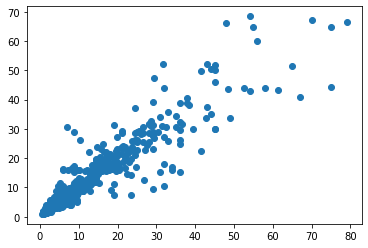

In [60]:
plt.scatter(y_test,predictions)

In [61]:
from sklearn import metrics

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.7301215560975611
MSE: 13.884449471127002
RMSE: 3.726184304503335


In [63]:
import pickle
file = open('random_forest_regression_model.pkl',"wb")

In [64]:
pickle.dump(model,file)

In [65]:
scores = [LR_Score,DTR_Score,RFR_Score]
algorithms = ["Linear Regression","Decision Tree Regressor","Random Forest Regressor"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Linear Regression is: 0.3766418182143585 %
The accuracy score achieved using Decision Tree Regressor is: 0.772226157815934 %
The accuracy score achieved using Random Forest Regressor is: 0.8754592471324634 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

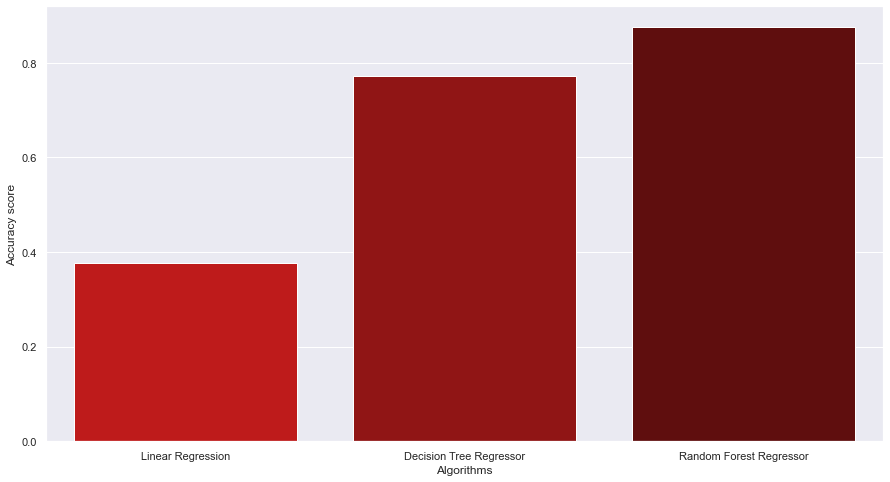

In [66]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(x = algorithms,y = scores,palette=("flag"))